<a href="https://colab.research.google.com/github/HEVNAGI/CSST106-CS4B/blob/main/4B_MAGPANTAY_EXER2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84


In [2]:
#2
!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libdc1394-22-dev


In [3]:
#3
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

Cloning into 'opencv'...
remote: Enumerating objects: 336484, done.
remote: Counting objects: 100% (1250/1250), done.
remote: Compressing objects: 100% (974/974), done.
remote: Total 336484 (delta 566), reused 730 (delta 232), pack-reused 335234 (from 1)
Receiving objects: 100% (336484/336484), 527.35 MiB | 25.71 MiB/s, done.
Resolving deltas: 100% (234569/234569), done.
Updating files: 100% (7566/7566), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41567, done.
remote: Counting objects: 100% (1326/1326), done.
remote: Compressing objects: 100% (958/958), done.
remote: Total 41567 (delta 501), reused 910 (delta 292), pack-reused 40241 (from 1)
Receiving objects: 100% (41567/41567), 149.99 MiB | 24.95 MiB/s, done.
Resolving deltas: 100% (25630/25630), done.


In [4]:
#4
%cd opencv
!mkdir build
%cd build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..
!make -j8
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/miniflann.cpp.o
[  7%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/flann.cpp.o
[  7%] Building CXX object modules/hdf/CMakeFiles/opencv_hdf.dir/src/hdf5.cpp.o
[  7%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  7%] Building CXX object modules/signal/CMakeFiles/opencv_signal.dir/src/signal_resample.cpp.o
[  7%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/ann_mlp.cpp.o
[  7%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/boost.cpp.o
[  7%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/accum.cpp.o
[  7%] Linking CXX executable ../../bin/opencv_version
[  7%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/data.cpp.o
[  7%] Built target opencv_version
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/em.cpp.o
[  8%] Linking

# ***Mounting Google Drive to Colab***




In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


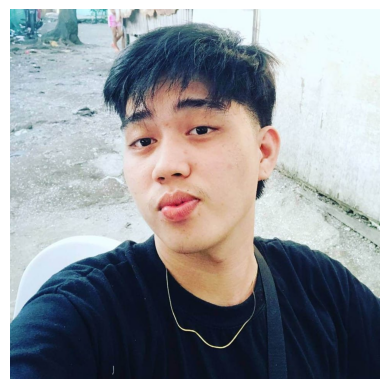

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to your image in Google Drive
image_path = '/content/drive/MyDrive/jandel1.jpg'

# Open and display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


# ***Task 1: SIFT Feature Extraction***

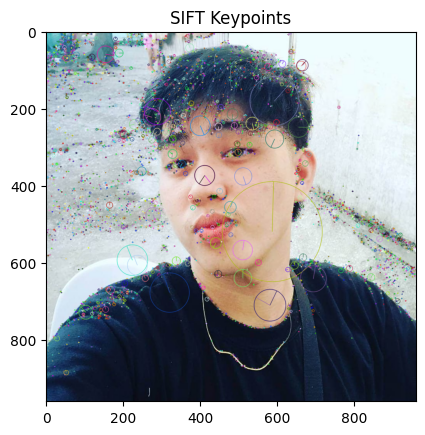

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/jandel1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.imshow(cv2.cvtColor(sift_image, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()


# ***Task 2: SURF Feature Extraction***

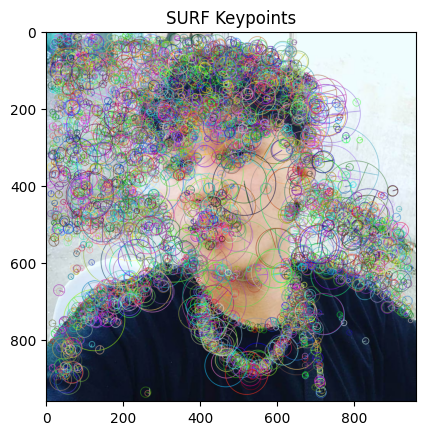

In [9]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/jandel1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize SURF detector
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and descriptors
keypoints, descriptors = surf.detectAndCompute(gray_image, None)

# Draw keypoints on the image
surf_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.imshow(cv2.cvtColor(surf_image, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.show()



# ***Task 3: ORB Feature Extraction***

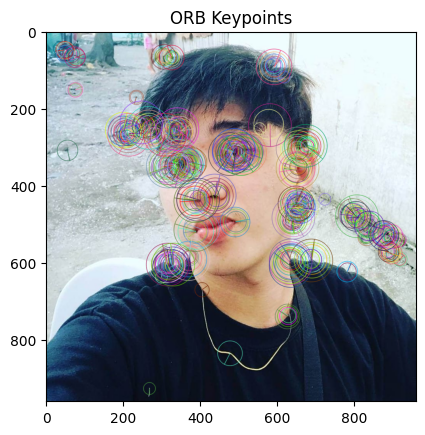

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/jandel1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw keypoints on the image
orb_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.imshow(cv2.cvtColor(orb_image, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.show()


# ***Task 4: Feature Matching ***

# ***Brute-Force Matching for ORB (Hamming distance)***

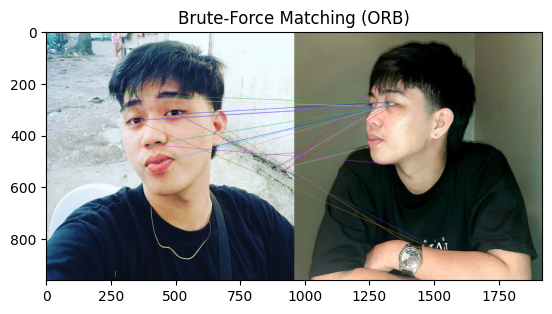

In [12]:
import cv2
import matplotlib.pyplot as plt

# Load the two images
image1 = cv2.imread('/content/drive/MyDrive/jandel1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/jandel2.jpg')

# Convert both images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors in both images
keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

# Brute-Force matcher with Hamming distance for ORB
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matched keypoints on both images
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:20], None, flags=2)

# Display the result
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('Brute-Force Matching (ORB)')
plt.show()


# ***FLANN Matching for SIFT or SURF (Euclidean distance)***

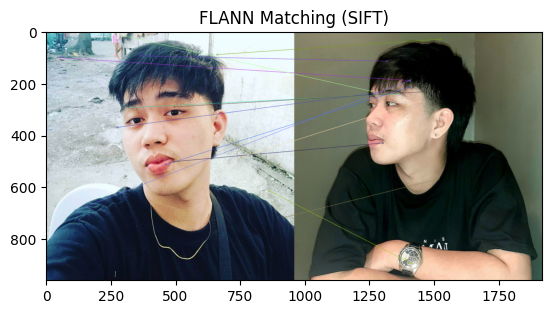

In [13]:
# Initialize SIFT or SURF detector (choose one)
sift = cv2.SIFT_create()
# surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# FLANN-based matcher parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Higher checks means more accuracy but slower matching

# Initialize FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors using KNN (k-Nearest Neighbors)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Store only good matches using the ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matched keypoints on both images
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=2)

# Display the result
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('FLANN Matching (SIFT)')
plt.show()


# ***Task 5: Applications of Feature Matching***

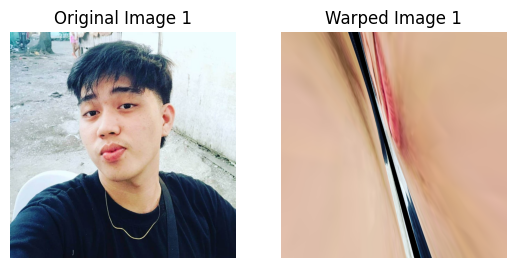

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images
image1 = cv2.imread('/content/drive/MyDrive/jandel1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/jandel2.jpg')

# Convert both images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize the feature detector (use SIFT for example)
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# Use FLANN-based matcher to match features
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# If enough good matches are found, estimate homography
MIN_MATCH_COUNT = 10
if len(good_matches) > MIN_MATCH_COUNT:
    # Extract the matched keypoints
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Compute the homography matrix
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Get the size of the second image to warp the first image onto it
    height, width, _ = image2.shape
    warped_image = cv2.warpPerspective(image1, H, (width, height))

    # Display the aligned images
    plt.subplot(121), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title('Original Image 1'), plt.axis('off')

    plt.subplot(122), plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
    plt.title('Warped Image 1'), plt.axis('off')

    plt.show()
else:
    print("Not enough matches are found - {}/{}".format(len(good_matches), MIN_MATCH_COUNT))


# ***Task 6: Combining Feature Extraction Methods***

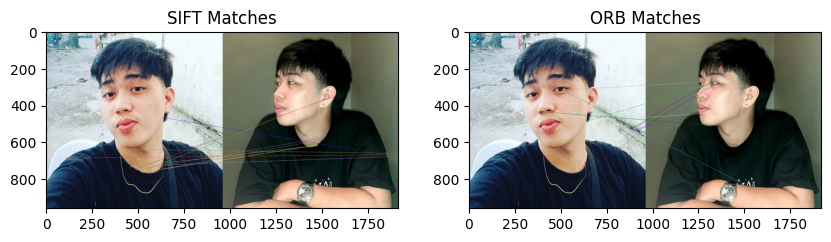

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images
image1 = cv2.imread('/content/drive/MyDrive/jandel1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/jandel2.jpg')

# Convert both images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT and ORB detectors
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

# Detect keypoints and descriptors with SIFT
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(gray_image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(gray_image2, None)

# Detect keypoints and descriptors with ORB
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(gray_image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(gray_image2, None)

# Use Brute-Force matcher for both SIFT and ORB
# SIFT uses L2 norm (Euclidean distance), ORB uses Hamming distance
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match SIFT descriptors
matches_sift = bf_sift.match(descriptors1_sift, descriptors2_sift)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

# Match ORB descriptors
matches_orb = bf_orb.match(descriptors1_orb, descriptors2_orb)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Visualize the top 10 matches from both SIFT and ORB
# Combine both matching results by concatenating them
# Optionally, you can apply further filtering for redundant matches
matches_combined = matches_sift[:10] + matches_orb[:10]

# Draw combined matches
matched_image = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift[:10], None, flags=2)
matched_image_orb = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, matches_orb[:10], None, flags=2)

# Display the result for SIFT + ORB
plt.figure(figsize=(10,5))

# Display SIFT matches
plt.subplot(121)
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('SIFT Matches')

# Display ORB matches
plt.subplot(122)
plt.imshow(cv2.cvtColor(matched_image_orb, cv2.COLOR_BGR2RGB))
plt.title('ORB Matches')

plt.show()
